In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from scipy.stats import kurtosis, skew
from statsmodels.tsa.stattools import adfuller

import scipy.stats as st
from scipy.stats import shapiro
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('Homework_1_DATA.csv', sep = ";", decimal = ",")
series1 = data.iloc[:300,0]
series2 = data.iloc[:200,1]
series3 = data.iloc[:200,2]
series4 = data.iloc[:200,3]
series5 = data.iloc[:200,4]
series6 = data.iloc[:2000,5]

In [3]:
def plot_graphs(y, num_lags, acf_only=None):
    if not acf_only:
        plt.plot(y)
        plt.show()
    plot_acf(y,lags=num_lags)
    plt.show()
    plot_pacf(y,lags=num_lags,method="ols")
    plt.show()

In [4]:
def statistics(y): 
    # Basic statistics
    mean = np.mean(y)
    std = np.std(y)
    kur = kurtosis(y)
    skewness = skew(y)
    return {'mean': mean, 'std': std, 'kur': kur, 'skewness': skewness}

In [5]:
def adf(y):
    # Ho: the process is not stationary. We need, at least, a unit root
    # H1: the process is stationary. We have to check different models (lags)
    adf_test = adfuller(y,maxlag=10) 
    print("ADF test for the original series")
    print("Statistic Value:" , adf_test[0])
    print("p-value:" , adf_test[1])

In [6]:
import scipy.stats as st
import seaborn as sns
def hist(y, mean, std):
    mu = np.mean(y)
    sigma = np.std(y)
    x = np.linspace(mu -5*sigma, mu +5*sigma, 1000)
    pdf = st.norm.pdf(x, mu, sigma)
    ax = plt.plot(x, pdf, lw = 2, color = "g")
    ax = plt.hist(y,density=True, range = (mean - 3*std, mean + 3*std), color = "r")
    ax = sns.distplot(y, hist = False, kde = True,
                     kde_kws = {'linewidth': 2}, color = "blue")
    ax.set_xlim(mean - 5*std, mean + 5*std)
    
    plt.show()

In [7]:
from scipy.stats import shapiro
def shap(y):
    # Normality test
    saphiro = shapiro(y)
    
    print("Saphiro",saphiro)

In [8]:
import statsmodels.api as sm
def box_test(y, lags):
    #Correlation test
    result = sm.stats.acorr_ljungbox(y, lags=[lags])
    return result

# Series 6

In [9]:
y = series6

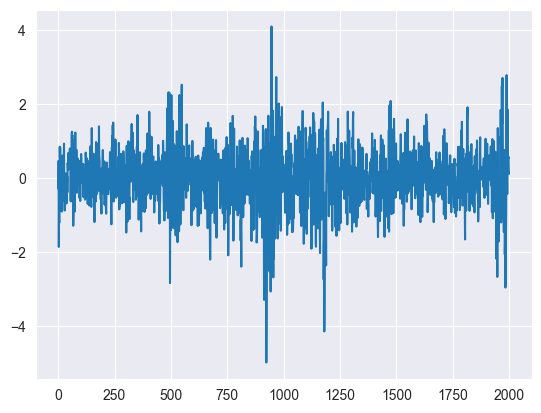

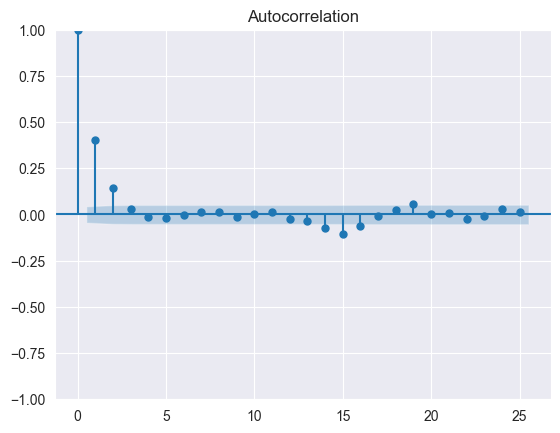

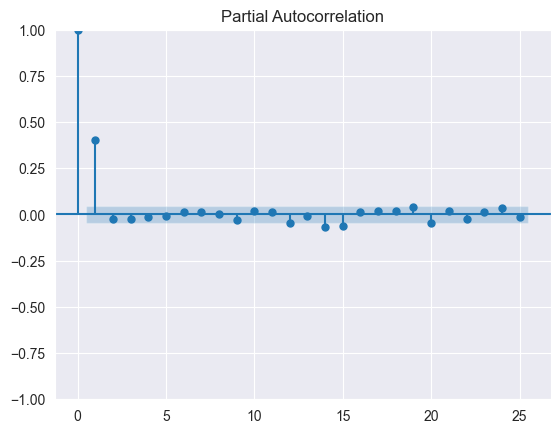

In [10]:
plot_graphs(y, 25)

In [11]:
stats = statistics(y)
stats

{'mean': 0.0007714999999999996,
 'std': 0.7911889668642694,
 'kur': 2.265013545953053,
 'skewness': -0.2969329347405381}

In [12]:
adf(y)

ADF test for the original series
Statistic Value: -29.156896625922325
p-value: 0.0


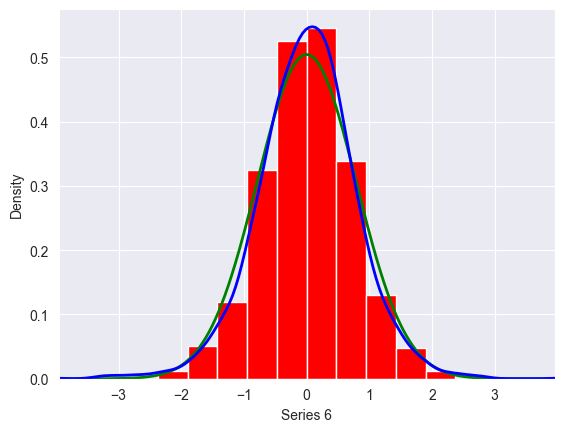

In [13]:
hist(y, mean=stats['mean'], std=stats['std'])

In [14]:
shap(y)

Saphiro ShapiroResult(statistic=0.9815436005592346, pvalue=2.07946037979515e-15)


In [15]:
box_test(y, 20)

,lb_stat,lb_pvalue
20,422.857971,3.656566e-77


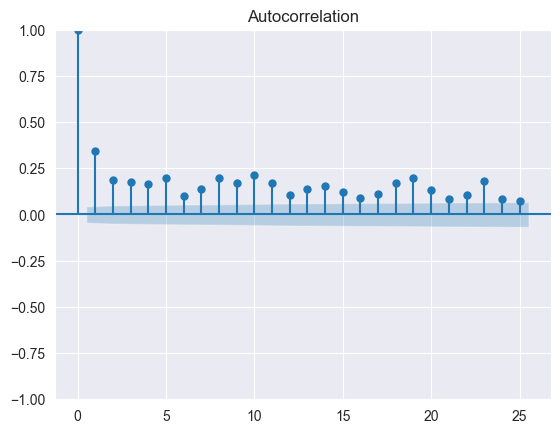

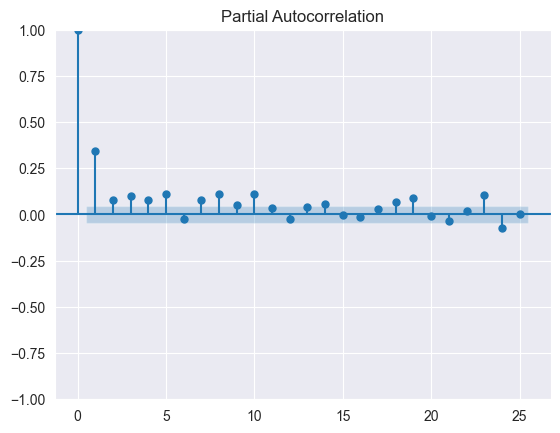

In [16]:
plot_graphs(y**2, 25, acf_only=True)

In [17]:
box_test(y**2, 20)

,lb_stat,lb_pvalue
20,1185.410415,9.858672e-239


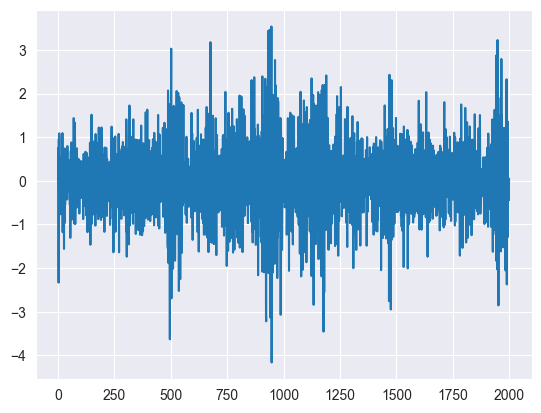

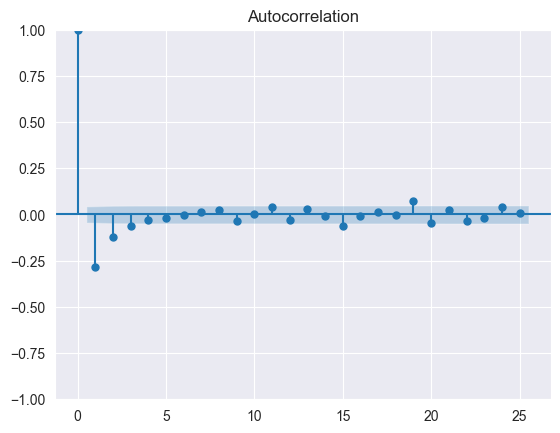

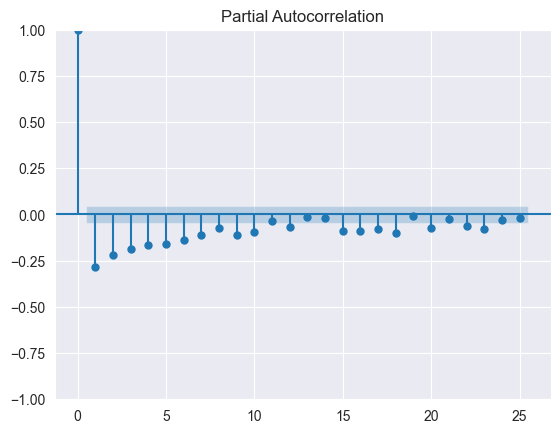

In [18]:
z = y.diff().dropna()
plot_graphs(z, 25)

In [19]:
stats = statistics(z)
stats

{'mean': 0.0001935967983992025,
 'std': 0.864855542616116,
 'kur': 1.4283457834080062,
 'skewness': -0.05597647054956211}

In [20]:
adf(z)

ADF test for the original series
Statistic Value: -21.594098372068405
p-value: 0.0


In [21]:
print('Ljung-Box for z')
box_test(z,20)

Ljung-Box for z


,lb_stat,lb_pvalue
20,233.872239,2.002243e-38


In [22]:
print("Ljung-Box for z**2")
box_test(z**2, 20)

Ljung-Box for z**2


,lb_stat,lb_pvalue
20,1081.721811,1.420281e-216


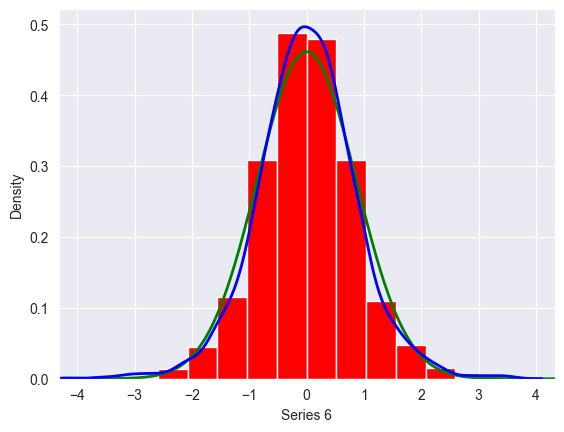

In [23]:
hist(z,mean=stats['mean'], std=stats['std'])

In [24]:
shap(z)

Saphiro ShapiroResult(statistic=0.9879332780838013, pvalue=6.539065729865845e-12)


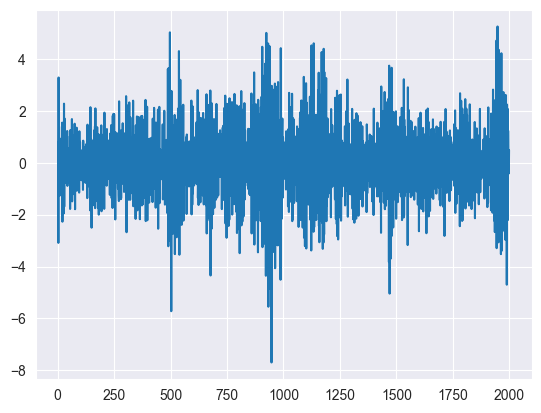

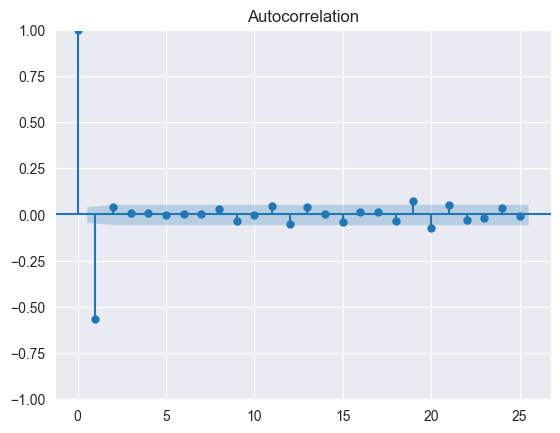

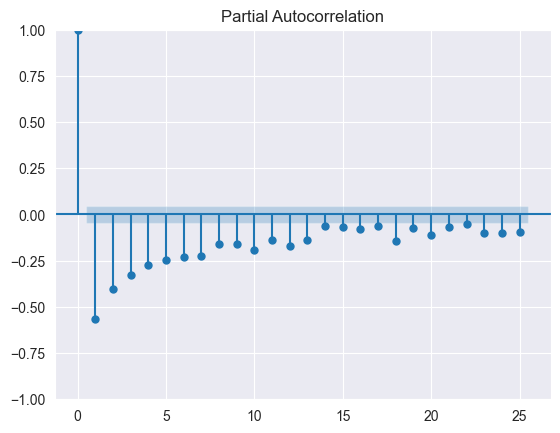

In [25]:
zz = y.diff(1).diff(1).dropna()
plot_graphs(zz, 25)

In [26]:
adf(zz)

ADF test for the original series
Statistic Value: -29.202428622746755
p-value: 0.0


In [27]:
print('Ljung-Box for zz')
box_test(zz,20)

Ljung-Box for zz


,lb_stat,lb_pvalue
20,682.955833,8.914363e-132


In [28]:
print('Ljung-Box for zz**2')
box_test(zz**2,20)

Ljung-Box for zz**2


,lb_stat,lb_pvalue
20,1124.180849,1.209818e-225


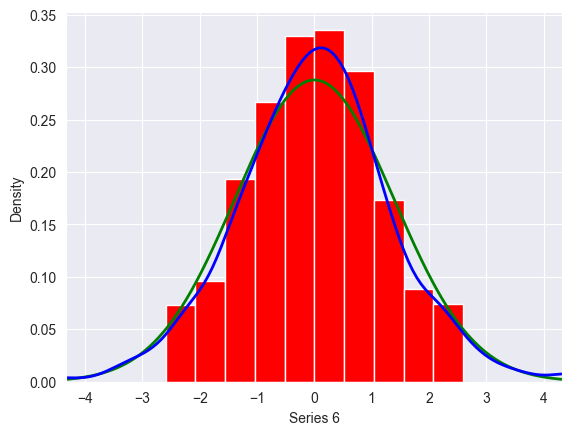

In [29]:
hist(zz,mean=stats['mean'], std=stats['std'])

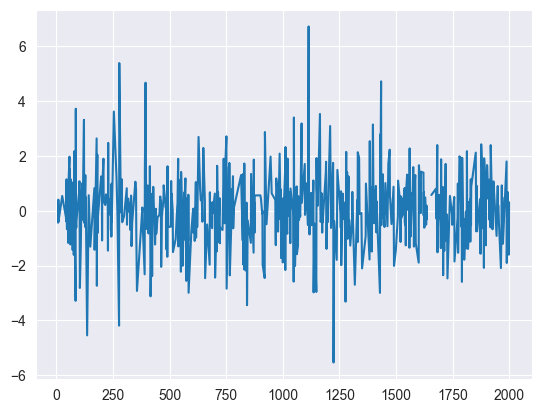

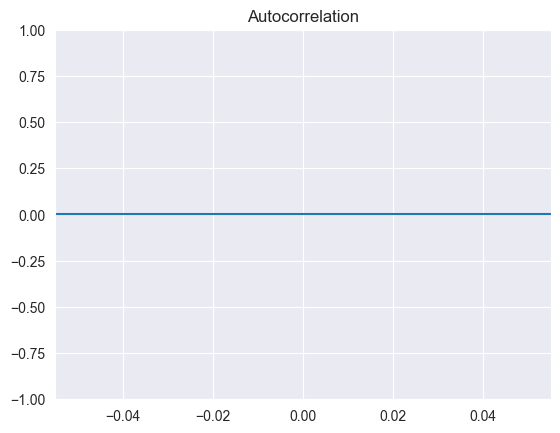

LinAlgError: SVD did not converge in Linear Least Squares

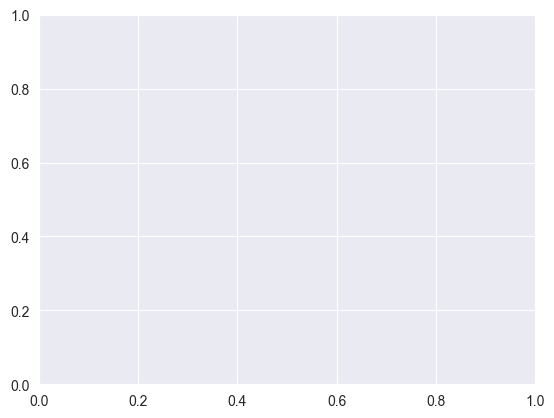

In [30]:
returns = np.log(y).diff().dropna() # we take log first and then one differente, diff(log(spot))
zz = returns
num_lags = 25
plot_graphs(zz, num_lags=num_lags)

In [31]:
adf(zz)

MissingDataError: exog contains inf or nans

In [ ]:
print('Ljung-Box for zz')
box_test(zz,20)

In [ ]:
print('Ljung-Box for zz**2')
box_test(zz**2,20)

In [ ]:
hist(zz,mean=stats['mean'], std=stats['std'])

In [ ]:
shap(zz)